# Predicting Cancellation for Hotels/Resorts Room Bookings

#### By: Saurav Kumar Das

### Problem Statement: 

* With the increase trend of cancellation from year to year, some hotel have think that high cancellation in hotel is the new norm of the industry which is a completely wrong approach.

* One out of four hotel guests are cancelling hotel booking ahead of a stay. This cancellation trend has effect the hotel not being able to accurately forecast occupancy within their revenue management.

* This trend of cancellation also have causes hotel loss in opportunity cost (unsold room due to cancellation).

### Project Goals: 

1. The Goals of this project is to find out the characteristic of customers who cancelled and finding a pattern in cancelled booking by doing an exploratory data analysis
2. Building classification machine learning model to predict cancellation, that has accuracy score around 0.75 - 0.9.


### Loading Data:

#### Importing Necessary Libraries 

In [2]:
#for stats, preprocessing and EDA

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import re

#for feature engineering, model preparing, model accuracy

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel, SelectPercentile
from sklearn.dummy import DummyClassifier

import warnings
warnings.filterwarnings('ignore')

In [3]:
#just to see all cols throughout the project

pd.set_option('display.max_columns', None)

#### Importing Hotel Data 

The data for this project is from Hotel Booking Demand Dataset Sciencedirect. This data was acquired by extraction from hotel’s Property management system from 2015 to 2017 from hotel in Region Algarve and Lisbon.

In [4]:
#as the file is in same place as that of working directory

hotel_bookings = pd.read_csv('hotel_bookings.csv')
hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
hotel_bookings.shape

(119390, 32)

The Dataset contains 32 features and 119390 entries in total.

### Data Cleaning

#### Missing Data: 

It is important to check for and handle missing data before modeling as it can affect the model's performance.

In [6]:
# Checking for missing data

hotel_bookings.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

*Missing values:*

* children 
* country
* agent
* company 

In [7]:
#percentage of missing data:
percent_missing = hotel_bookings.isnull().mean() * 100
percent_missing

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [8]:
#finding unique values for agent and comapny cols

#print(hotel_bookings["agent"].unique())
#print(hotel_bookings["company"].unique())

#there are various numbers present for these two cols, perhaps id for representing agents and company

**Insights**: The Null values in cols "children" and "country" is a customer input and thus it can be null, we can drop these values as the percentage of it is very low(less than 1%). But the other two cols are filled in by the hotels and just indicates the booking did not come through an agent nor the customer has provided the company name so the null values can be replaced as:
- for agent(13.686238%), "No Agent" and
- for company(94.306893%), "No Company"

This way the data will make much more sense if these and we don't have to drop these two cols with such high null values all together.

Manipulating all 4 cols missing value accordingly:

In [9]:
#for agent and comapny:

hotel_bookings["agent"].fillna("No Agent", inplace=True)
hotel_bookings["company"].fillna("No Company", inplace=True)

In [10]:
#for children col: (as the percentage of miss value is just 0.003350%, we can simply drop these rows)

hotel_bookings.dropna(subset="children", inplace=True)

In [11]:
#for country col: (although we can drop these missing values as well(0.408744), but it might be helpful in primary analysis and
#the country col might just not contribute towards model building towards the end... so for the time being let's replace null 
#values with "not provided")

hotel_bookings["country"].fillna("Not Provided", inplace=True)

In [12]:
#to check no missing value left
hotel_bookings.isnull().sum().sum()

0

### Data Analysing

In [13]:
#checking the data type of all features

hotel_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119386 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119386 non-null  object 
 1   is_canceled                     119386 non-null  int64  
 2   lead_time                       119386 non-null  int64  
 3   arrival_date_year               119386 non-null  int64  
 4   arrival_date_month              119386 non-null  object 
 5   arrival_date_week_number        119386 non-null  int64  
 6   arrival_date_day_of_month       119386 non-null  int64  
 7   stays_in_weekend_nights         119386 non-null  int64  
 8   stays_in_week_nights            119386 non-null  int64  
 9   adults                          119386 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119386 non-null  int64  
 12  meal            

**Insights:**
- children col is in float datatype, should be an int
- reservation_status_date col should be of datetime type

Putting in the required changes:

In [14]:
hotel_bookings["children"] = hotel_bookings["children"].astype(int)
hotel_bookings["reservation_status_date"] = pd.to_datetime(hotel_bookings["reservation_status_date"])

In [15]:
#checking for duplicate values (original length after treating all missing values is 119386)

len(hotel_bookings[hotel_bookings.duplicated(keep="first")])

31994

**Insights:** Clearly we have a lot of duplicate values, but as there is no unique key feature such as booking id in the data and thus we can not remove any duplicate value from the data. Either way in case of model training duplicate values won't affect the performance.

### EDA
Let's do some **data visualization**:

First of all let's see the values in few of the important categorical cols:

In [16]:
print(hotel_bookings["hotel"].unique())
print(hotel_bookings["market_segment"].unique())
print(hotel_bookings["reserved_room_type"].unique())
print(hotel_bookings["deposit_type"].unique())
print(hotel_bookings["customer_type"].unique())
print(hotel_bookings["reservation_status"].unique())

['Resort Hotel' 'City Hotel']
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Aviation']
['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']
['No Deposit' 'Refundable' 'Non Refund']
['Transient' 'Contract' 'Transient-Party' 'Group']
['Check-Out' 'Canceled' 'No-Show']


Next let's check out our **target variable:**

In [17]:
#checking various cancellation types

is_canceled = len(hotel_bookings[hotel_bookings['is_canceled'] == 1])

print("Percentage cancelation= ", is_canceled / len(hotel_bookings))
cancellation_types = hotel_bookings['reservation_status'].value_counts(normalize = True) * 100
print(cancellation_types)

Percentage cancelation=  0.3703951887155948
Check-Out    62.960481
Canceled     36.028513
No-Show       1.011006
Name: reservation_status, dtype: float64


**Insight:** Above we have all reservation status in percentage. 

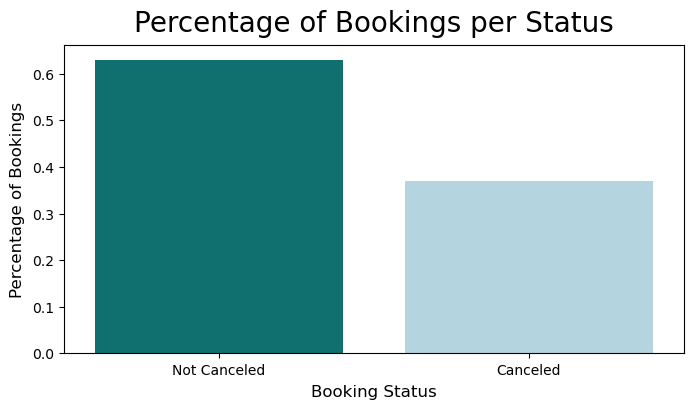

In [18]:
#Visualizing the percentage of canceled vs not canceled bookings: 

plt.figure(figsize=(8,4)) 
plt.title("Percentage of Bookings per Status", fontsize = 20, pad = 10)
sns.barplot(x=hotel_bookings['is_canceled'].unique(), y=hotel_bookings['is_canceled'].value_counts(normalize=True), palette=['teal', 'lightblue'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Percentage of Bookings", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);

**Insight:** Almost 37% cancellation rate

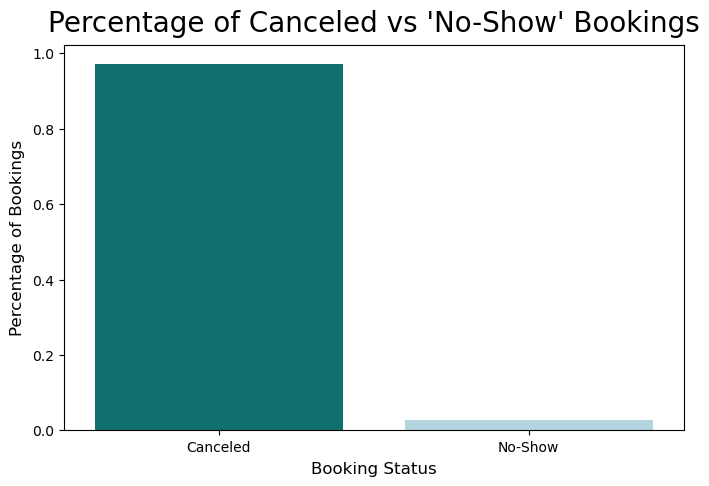

In [19]:
#Visualizing the percentage of bookings canceled prior to arrival: 

plt.figure(figsize=(8,5)) 
plt.title("Percentage of Canceled vs 'No-Show' Bookings", fontsize = 20, pad = 10)
sns.barplot(x=hotel_bookings[hotel_bookings['is_canceled']==1]['reservation_status'].unique(), y=hotel_bookings[hotel_bookings['is_canceled']==1]['reservation_status'].value_counts(normalize=True), palette=['teal', 'lightblue'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Percentage of Bookings", fontsize = 12, labelpad = 5);

**Insight:** Most of the bookings were cancelled before arrival.

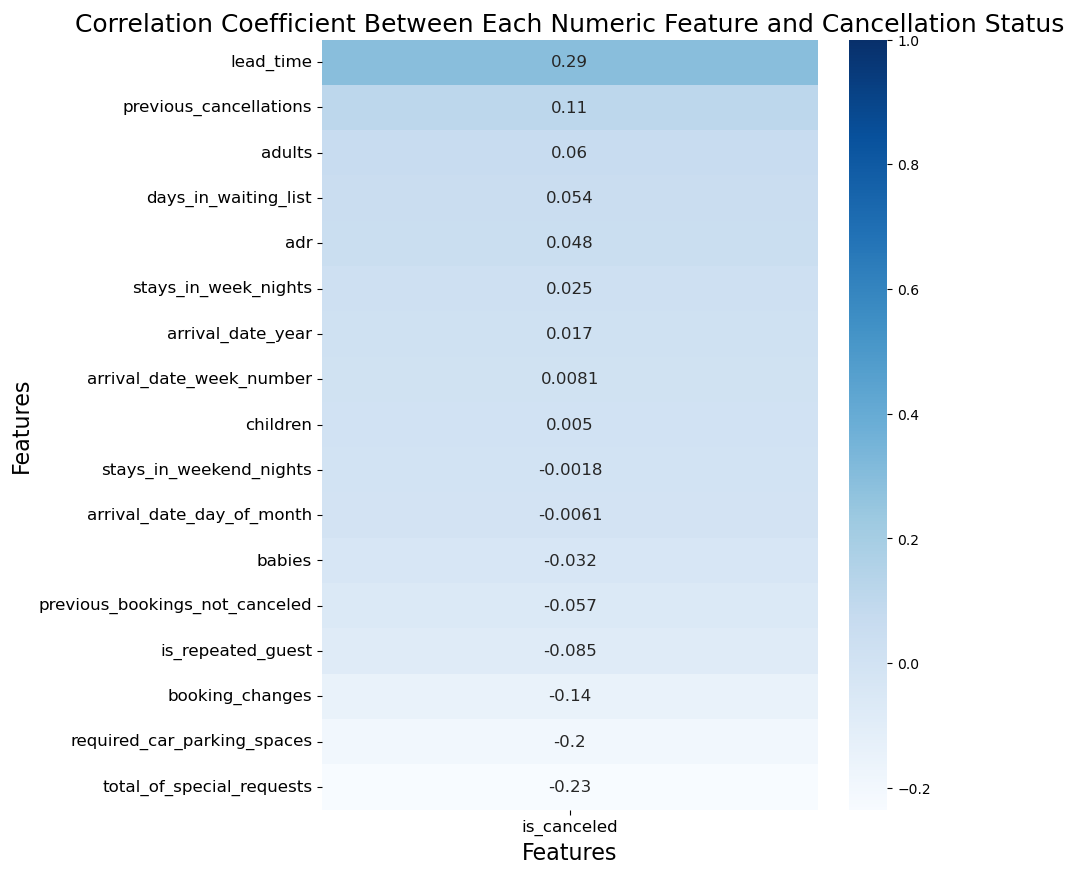

In [20]:
#Visualizing correlation coefficients between features and cancellation:

fig = plt.figure(figsize=(8,10))
ax = sns.heatmap(hotel_bookings.corr()[['is_canceled']].sort_values('is_canceled', ascending=False), annot = True, annot_kws = {"size":12}, cmap='Blues')
ax.set_title('Correlation Coefficient Between Each Numeric Feature and Cancellation Status', fontsize=18)
ax.set_xlabel('Features', fontsize = 16)
ax.set_ylabel('Features', fontsize = 16)
ax.tick_params(axis = "both", labelsize = 12);
y_min, y_max = ax.get_ylim()
ax.set_ylim(top=y_max+1);

**Insights:** From the above heat map for correlation we can say which features are strongly correlated to our target variable:
- Highest positive correlations : lead_time
- Highest negative correlations : total_of_special_requests followed by required_car_parking_spaces

(As the correlations are very less let's first consider those >=2)

So let's visualize these features along side our target variable and see how they actually affect it.

**Assumptions:**
*1) Lead time:* As the time between booking and arrival increases the chances are high that a person might cancel the reservation for any change in plan due to unseen circumstances. 

*2) Total special requests:* This is highest negetively correlated to cancellation which makes sense, as if the total number of special requests increases the likelihood of that customer canelling the reservation decreases.

*3) Required car parking space:* This is also negetively correlated, suggesting if request increases then chances of cancellation decreases.

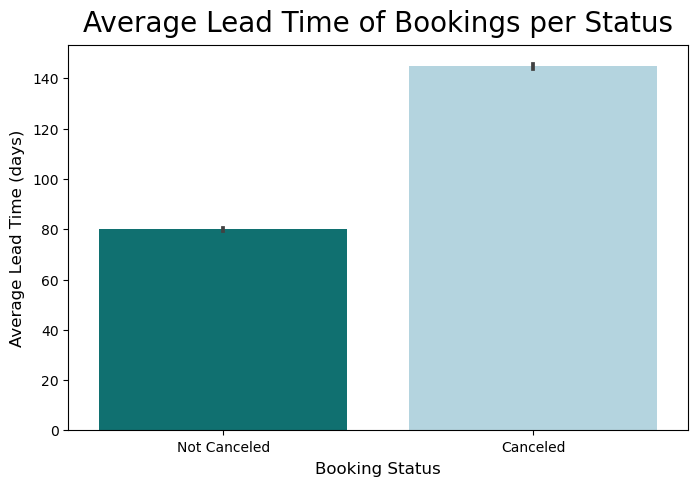

In [21]:
#Visualizing the average lead time for canceled and not canceled bookings:

plt.figure(figsize=(8,5)) 
plt.title("Average Lead Time of Bookings per Status", fontsize = 20, pad = 10)
sns.barplot(x=hotel_bookings['is_canceled'], y=hotel_bookings['lead_time'], palette=['teal', 'lightblue'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Average Lead Time (days)", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);

**Conclusion:** As per our assumption this means higher lead time leads to higher cancellation rate.

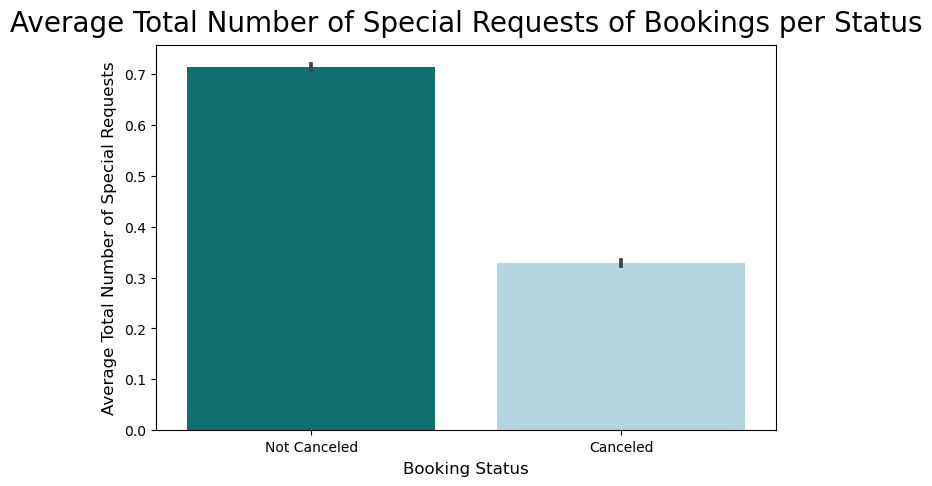

In [22]:
#Visualizing the total number of special requests for canceled and not canceled bookings:

plt.figure(figsize=(8,5)) 
plt.title("Average Total Number of Special Requests of Bookings per Status", fontsize = 20, pad = 10)
sns.barplot(x=hotel_bookings['is_canceled'], y=hotel_bookings['total_of_special_requests'], palette=['teal', 'lightblue'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Average Total Number of Special Requests", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);

**Conclusion:** This also checks out with our assumtion, customers with less requests cancel reservations.

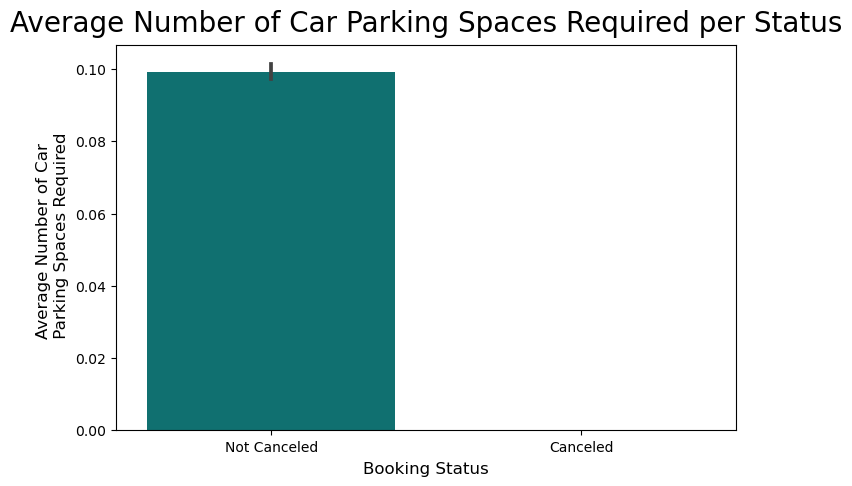

In [23]:
#Visualizing the total number of requested parking spaces for canceled and not canceled bookings:

plt.figure(figsize=(8,5)) 
plt.title("Average Number of Car Parking Spaces Required per Status", fontsize = 20, pad = 10)
sns.barplot(x=hotel_bookings['is_canceled'], y=hotel_bookings['required_car_parking_spaces'], palette=['teal', 'lightblue'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Average Number of Car \n Parking Spaces Required", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);

**Conclusion:** People who have made reservations enquiring for parking space never cancel reservations. It suggests if hotels can add parking are to their hotels, it's good for business.

*Now let's also check for other features to find some useful insights:*

Cancellations in resort hotel=  0.27763354967548676
Cancellations in city hotel=  0.4172402490986562


Text(0.5, 1.0, 'Total count of bookings and cancellations per hotel')

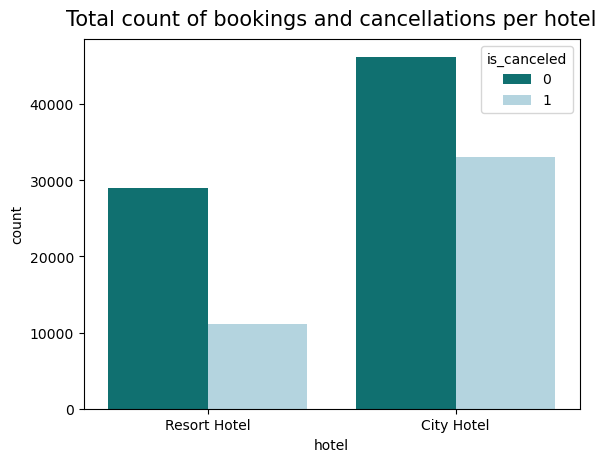

In [24]:
#1 Hotel Type:

resort_canceled = hotel_bookings[(hotel_bookings['hotel'] == 'Resort Hotel') & (hotel_bookings['is_canceled'] == 1)]
city_canceled = hotel_bookings[(hotel_bookings['hotel'] == 'City Hotel') & (hotel_bookings['is_canceled'] == 1)]

print('Cancellations in resort hotel= ', (len(resort_canceled)) / (len(hotel_bookings[hotel_bookings['hotel'] == 'Resort Hotel'])))
print('Cancellations in city hotel= ', (len(city_canceled)) / (len(hotel_bookings[hotel_bookings['hotel'] == 'City Hotel'])))


sns.countplot(data = hotel_bookings, x = 'hotel', hue = 'is_canceled', palette=['teal', 'lightblue'])
plt.title("Total count of bookings and cancellations per hotel", fontsize = 15, pad = 10)

**Insights:** City hotels have higher cancellation rate as compared to resort hotels.

In [25]:
#2 Customers with Childer or Babies

((len(hotel_bookings.loc[(hotel_bookings['children'] != 0) | (hotel_bookings['babies'] != 0)]))/(len(hotel_bookings))) * 100

7.816661920158142

**Insights:** Customers with children or babies are very less in number. Also it would be helpful if we combine these two features as they are the same.

Cancelations among new guests=  0.377829307122586
Cancelations among old guests=  0.14488188976377953


Text(0.5, 1.0, 'Total count of is repeated guest')

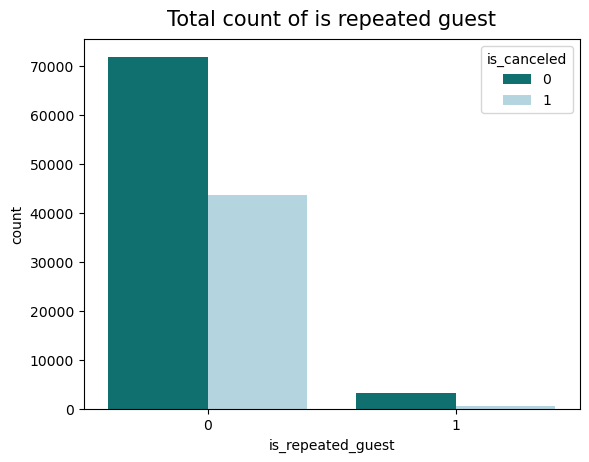

In [26]:
#3 New or old customers

new_guest = hotel_bookings[(hotel_bookings['is_repeated_guest'] == 0) & (hotel_bookings['is_canceled']==1)]
old_guest = hotel_bookings[(hotel_bookings['is_repeated_guest'] == 1) & (hotel_bookings['is_canceled']==1)]

print('Cancelations among new guests= ', (len(new_guest)) / (len(hotel_bookings[hotel_bookings['is_repeated_guest'] == 0])))
print('Cancelations among old guests= ', (len(old_guest)) / (len(hotel_bookings[hotel_bookings['is_repeated_guest'] == 1])))

sns.countplot(data = hotel_bookings, x ='is_repeated_guest', hue ='is_canceled', palette=['teal', 'lightblue'])
plt.title("Total count of is repeated guest", fontsize = 15, pad = 10)

**Insights:** Maximun customers are new comers and the old customers have very low cancellation rate(nearly 14%).

                                    cancellation %
previous_cancellations is_canceled                
0                      0                 66.096260
                       1                 33.903740
1                      0                  5.569327
                       1                 94.430673
2                      0                 67.241379
                       1                 32.758621
3                      0                 69.230769
                       1                 30.769231
4                      0                 77.419355
                       1                 22.580645
5                      0                 89.473684
                       1                 10.526316
6                      0                 68.181818
                       1                 31.818182
11                     0                 71.428571
                       1                 28.571429
13                     0                  8.333333
                       1       

Text(0.5, 1.0, 'Total count of previous cancellations')

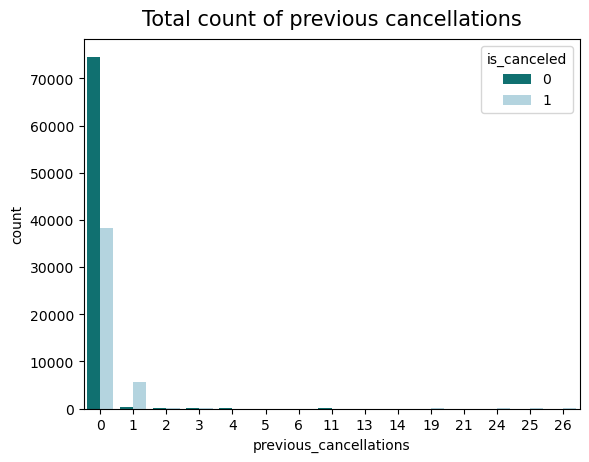

In [27]:
#4 Previous cancellations

prv_cancel_count = hotel_bookings.groupby(['previous_cancellations', 'is_canceled']).size().to_frame(name = 'cancellation %')
prv_cancel_perct = prv_cancel_count.groupby(level = 0).apply(lambda x:100 * x / float(x.sum()))
print(prv_cancel_perct)

sns.countplot(data = hotel_bookings, x='previous_cancellations', hue='is_canceled', palette=['teal', 'lightblue'])
plt.title("Total count of previous cancellations", fontsize = 15, pad = 10)

**Insights:** Maximum number of customers have zero previous cancellation and those who have cancelled before are more likely to cancel again. *This is a very important insight in regard to our problem statement.*

In [28]:
#5 Room type reserved vs assigned

val = hotel_bookings.loc[hotel_bookings['reserved_room_type'] != hotel_bookings['assigned_room_type']]
val['is_canceled'].value_counts(normalize=True) * 100

0    94.623584
1     5.376416
Name: is_canceled, dtype: float64

**Insights:** Quite interestingly there is very less cancellation rate even if the assigned room type is not that of reserved room type.

Text(0.5, 1.0, 'Booking Changes VS Cancellations')

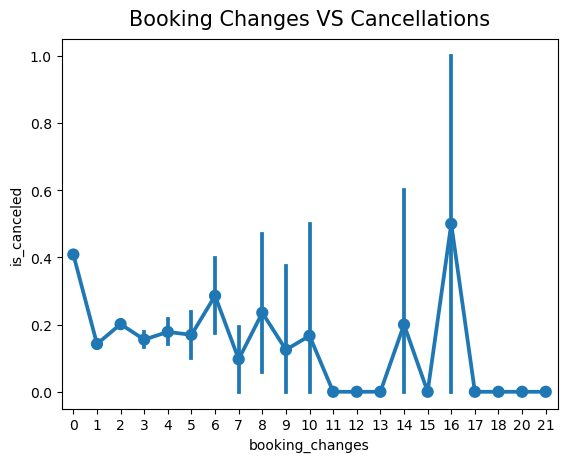

In [29]:
#6 Booking changes made by customer

sns.pointplot(data = hotel_bookings, x = 'booking_changes', y = 'is_canceled')
plt.title("Booking Changes VS Cancellations", fontsize = 15, pad = 10)

**Insights:** It seems there is no pattern here and thus we can not say if higher changes in booking leads to cancellation or not.

                          cancellation %
deposit_type is_canceled                
No Deposit   0                 71.625716
             1                 28.374284
Non Refund   0                  0.637554
             1                 99.362446
Refundable   0                 77.777778
             1                 22.222222


Text(0.5, 1.0, 'Cancellation VS Deposit type')

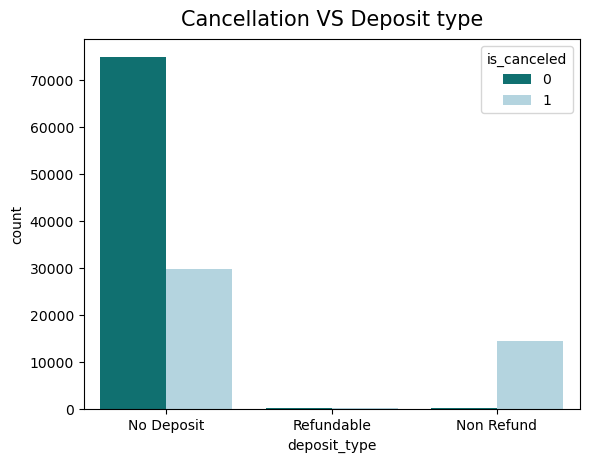

In [30]:
#7 Deposit type

type_count = hotel_bookings.groupby(['deposit_type', 'is_canceled']).size().to_frame(name = 'cancellation %')
type_perct = type_count.groupby(level = 0).apply(lambda x:100 * x / float(x.sum()))
print(type_perct)

sns.countplot(data = hotel_bookings, x = "deposit_type", hue = "is_canceled", palette=['teal', 'lightblue']);
plt.title("Cancellation VS Deposit type", fontsize = 15, pad = 10)

**Insights:** Quite surprisingly non refundable types have much more booking cancellation (almost 99%).

Text(0.5, 1.0, 'Days in waiting VS cancellations')

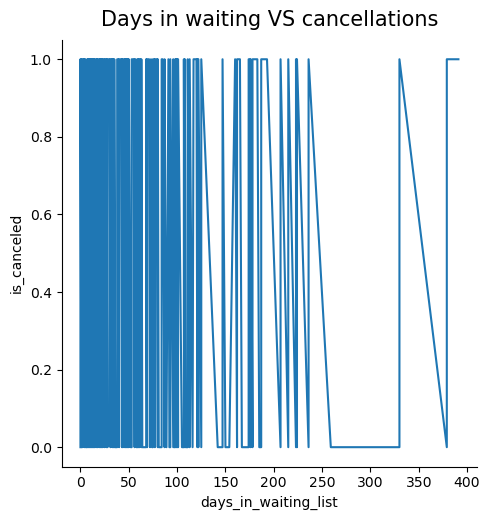

In [31]:
#8 Days in waiting list

sns.relplot(data = hotel_bookings, x ='days_in_waiting_list', y = 'is_canceled', kind = 'line', estimator = None)
plt.title("Days in waiting VS cancellations", fontsize = 15, pad = 10)

**Insights:** No relationship can be build between days_in_waiting_list and is_cancelled.

                               cancellation %
arrival_date_year is_canceled                
2015              0                 62.995635
                  1                 37.004365
2016              0                 64.136703
                  1                 35.863297
2017              0                 61.302136
                  1                 38.697864


Text(0.5, 1.0, 'Total number of bookings per year')

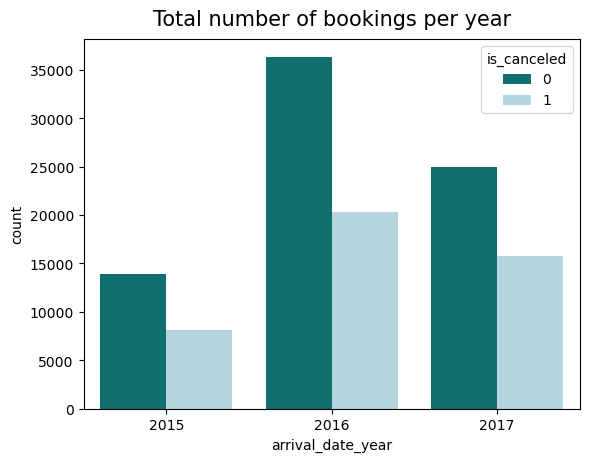

In [32]:
#9 Arrival year

year_count = hotel_bookings.groupby(['arrival_date_year', 'is_canceled']).size().to_frame(name = 'cancellation %')
year_perct = year_count.groupby(level = 0).apply(lambda x:100 * x / float(x.sum()))
print(year_perct)

sns.countplot(data = hotel_bookings, x = 'arrival_date_year', hue = 'is_canceled', palette=['teal', 'lightblue'])
plt.title("Total number of bookings per year", fontsize = 15, pad = 10)

                                cancellation %
arrival_date_month is_canceled                
April              0                 59.202814
                   1                 40.797186
August             0                 62.264831
                   1                 37.735169
December           0                 65.029499
                   1                 34.970501
February           0                 66.584036
                   1                 33.415964
January            0                 69.522685
                   1                 30.477315
July               0                 62.546402
                   1                 37.453598
June               0                 58.542828
                   1                 41.457172
March              0                 67.847662
                   1                 32.152338
May                0                 60.334153
                   1                 39.665847
November           0                 68.766559
             

Text(0.5, 1.0, 'Total Number of bookings per month')

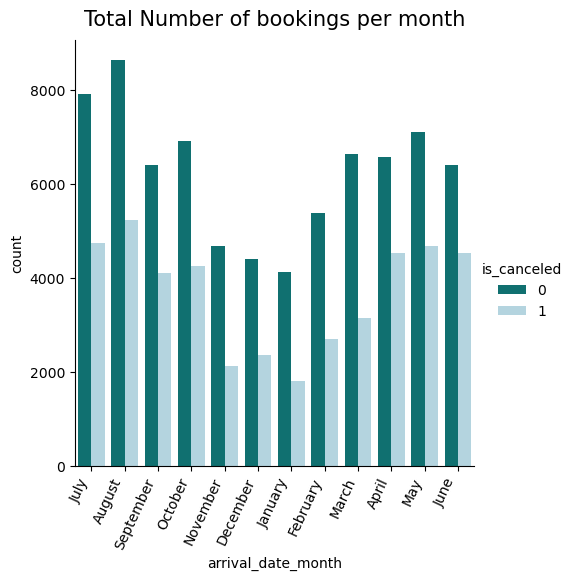

In [33]:
#9 Arrival month

month_count = hotel_bookings.groupby(['arrival_date_month', 'is_canceled']).size().to_frame(name = 'cancellation %')
month_perct = month_count.groupby(level = 0).apply(lambda x:100 * x / float(x.sum()))
print(month_perct)

chart = sns.catplot(data = hotel_bookings, x = 'arrival_date_month', hue = 'is_canceled', kind = 'count', palette=['teal', 'lightblue'])
chart.set_xticklabels(rotation = 65, horizontalalignment = 'right')
plt.title("Total Number of bookings per month", fontsize = 15, pad = 10)

**Insights:** 

- Despite higher number of booking in 2016, 2015 and 2017 have slightly higher cancellation rate.
- Month of April and June have highest cancellation rates overall.

                            cancellation %
market_segment is_canceled                
Aviation       0                 78.059072
               1                 21.940928
Complementary  0                 86.944818
               1                 13.055182
Corporate      0                 81.265345
               1                 18.734655
Direct         0                 84.664816
               1                 15.335184
Groups         0                 38.937964
               1                 61.062036
Offline TA/TO  0                 65.683967
               1                 34.316033
Online TA      0                 63.279977
               1                 36.720023


Text(0.5, 1.0, 'Total cancellations acorss market segment')

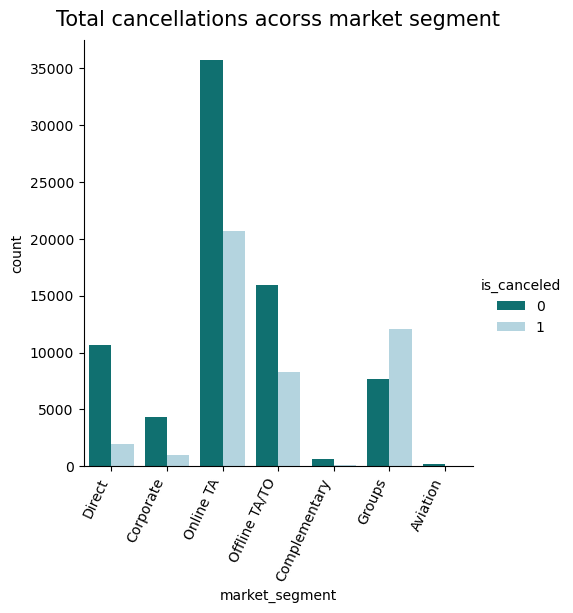

In [34]:
#10 Market segment

segment_count = hotel_bookings.groupby(['market_segment', 'is_canceled']).size().to_frame(name = 'cancellation %')
segment_perct = segment_count.groupby(level = 0).apply(lambda x:100 * x / float(x.sum()))
print(segment_perct)

chart = sns.catplot(data = hotel_bookings, x = 'market_segment', hue = 'is_canceled', kind = 'count', palette=['teal', 'lightblue'])
chart.set_xticklabels(rotation = 65, horizontalalignment = 'right')
plt.title("Total cancellations acorss market segment", fontsize = 15, pad = 10)

**Insights:** Cancellation rate is very high for Groups followed by Offline TA/TO and Online TA. *This indeed is a very useful information to decide what market segment we have to be careful of.*

                                  cancellation %
distribution_channel is_canceled                
Corporate            0                 77.924217
                     1                 22.075783
Direct               0                 82.540116
                     1                 17.459884
GDS                  0                 80.829016
                     1                 19.170984
TA/TO                0                 58.974149
                     1                 41.025851
Undefined            0                100.000000


Text(0.5, 1.0, 'Distribution of cancellations in various channels')

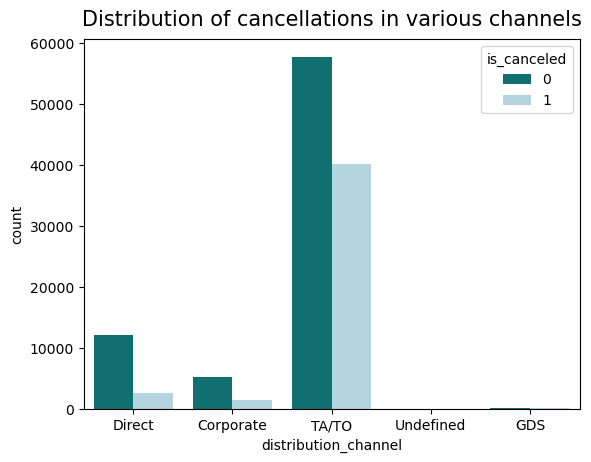

In [35]:
#11 Distribution channel

channel_count = hotel_bookings.groupby(['distribution_channel', 'is_canceled']).size().to_frame(name = 'cancellation %')
channel_perct = channel_count.groupby(level = 0).apply(lambda x:100 * x / float(x.sum()))
print(channel_perct)

sns.countplot(data = hotel_bookings, x = 'distribution_channel', hue = 'is_canceled', palette=['teal', 'lightblue'])
plt.title("Distribution of cancellations in various channels", fontsize = 15, pad = 10)

**Insights:** Very high cancellation for TA/TO channel.

                             cancellation %
customer_type   is_canceled                
Contract        0                 69.038273
                1                 30.961727
Group           0                 89.774697
                1                 10.225303
Transient       0                 59.253680
                1                 40.746320
Transient-Party 0                 74.582006
                1                 25.417994


Text(0.5, 1.0, 'Average Number of cancellations in each category')

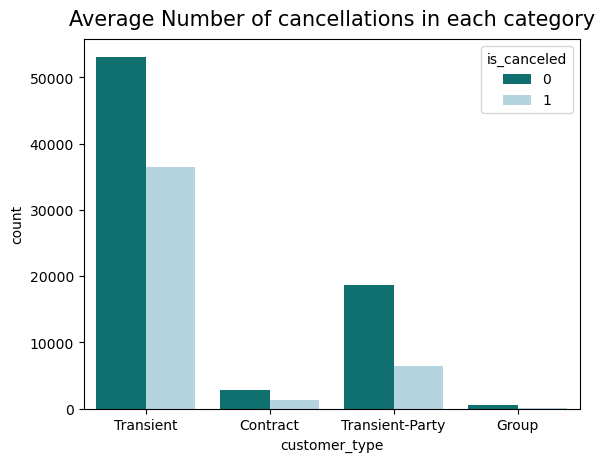

In [36]:
#12 Customer type

cus_type_count = hotel_bookings.groupby(['customer_type', 'is_canceled']).size().to_frame(name = 'cancellation %')
cus_type_perct = cus_type_count.groupby(level = 0).apply(lambda x:100 * x / float(x.sum()))
print(cus_type_perct)

sns.countplot(data = hotel_bookings, x = 'customer_type', hue = 'is_canceled', palette=['teal', 'lightblue'])
plt.title("Average Number of cancellations in each category", fontsize = 15, pad = 10)

**Insights:** High cancellation rate for Transient type(high count as well) followed by Contract.

                                cancellation %
reserved_room_type is_canceled                
A                  0                 60.892620
                   1                 39.107380
B                  0                 67.324955
                   1                 32.675045
C                  0                 66.952790
                   1                 33.047210
D                  0                 68.220405
                   1                 31.779595
E                  0                 70.711553
                   1                 29.288447
F                  0                 69.623749
                   1                 30.376251
G                  0                 63.562560
                   1                 36.437440
H                  0                 59.234609
                   1                 40.765391
L                  0                 66.666667
                   1                 33.333333
P                  1                100.000000


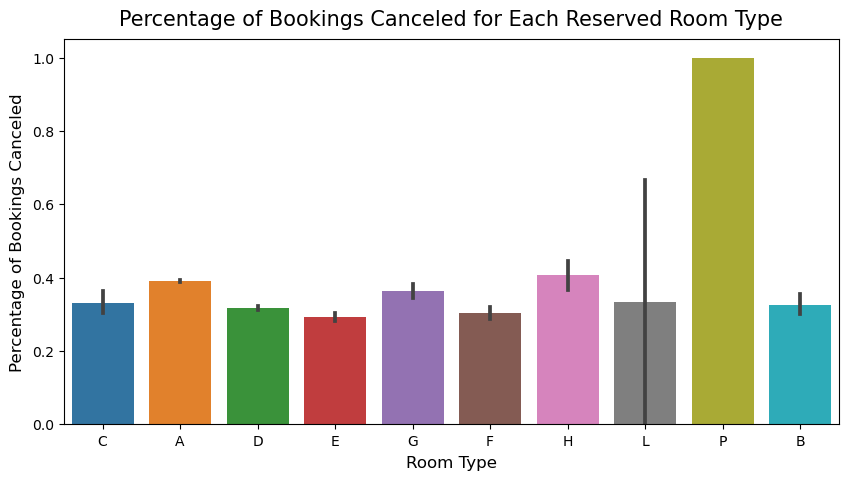

In [37]:
#13 Room type

room_type_count = hotel_bookings.groupby(['reserved_room_type', 'is_canceled']).size().to_frame(name = 'cancellation %')
room_type_perct = room_type_count.groupby(level = 0).apply(lambda x:100 * x / float(x.sum()))
print(room_type_perct)

#sns.countplot(data = hotel_bookings, x = 'reserved_room_type', hue = 'is_canceled', palette=['teal', 'lightblue'])
#plt.title("Average Number of cancellations in each category", fontsize = 15, pad = 10)

plt.figure(figsize=(10,5)) 
plt.title("Percentage of Bookings Canceled for Each Reserved Room Type", fontsize = 15, pad = 10)
sns.barplot(x=hotel_bookings['reserved_room_type'], y=hotel_bookings['is_canceled'])
plt.xlabel("Room Type", fontsize = 12, labelpad = 5)
plt.ylabel("Percentage of Bookings Canceled", fontsize = 12, labelpad = 5);

**Insights:** Room type P has a 100% cancellation rate, but as the data doesn't have any specifications about the room type we can't be sure why it was cancelled so much.

Text(0.5, 1.0, 'Meal type preferred count')

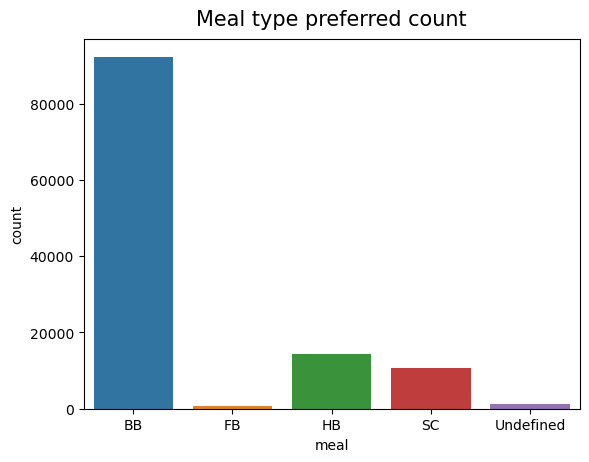

In [38]:
#15 Meals preferred

sns.countplot(data = hotel_bookings, x = 'meal')
plt.title("Meal type preferred count", fontsize = 15, pad = 10)

**Insights:** Most customers prefer BB type meal.

In [39]:
#16 Countries

hotel_bookings['country'].value_counts().head(5)

PRT    48586
GBR    12129
FRA    10415
ESP     8568
DEU     7287
Name: country, dtype: int64

**Insights:** These are the top 5 countries from where the customers belong to.

### Feature Engineering

In [40]:
hotel_bookings[['arrival_date_day_of_month','arrival_date_week_number','arrival_date_month','arrival_date_year']]

,arrival_date_day_of_month,arrival_date_week_number,arrival_date_month,arrival_date_year
0,1,27,July,2015
1,1,27,July,2015
2,1,27,July,2015
3,1,27,July,2015
4,1,27,July,2015
...,...,...,...,...
119385,30,35,August,2017
119386,31,35,August,2017
119387,31,35,August,2017
119388,31,35,August,2017


**Insight:** We won't need everything separately as present in the dataset, so we can simply merge everything to form a single date of arrival and can remove these features in future if unnecessary.

In [41]:
#creating single date of arrival by concatenating different col values and cahnging the format to datetime type

hotel_bookings['arrival_date_full'] = hotel_bookings['arrival_date_year'].astype(str) + "-" + hotel_bookings['arrival_date_month'].map({'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}).astype(str) + "-" + hotel_bookings['arrival_date_day_of_month'].astype(str)
hotel_bookings['arrival_date_full'] = pd.to_datetime(hotel_bookings['arrival_date_full'], format="%Y-%m-%d")

In [42]:
hotel_bookings[['arrival_date_full','reservation_status_date']]

,arrival_date_full,reservation_status_date
0,2015-07-01,2015-07-01
1,2015-07-01,2015-07-01
2,2015-07-01,2015-07-02
3,2015-07-01,2015-07-02
4,2015-07-01,2015-07-03
...,...,...
119385,2017-08-30,2017-09-06
119386,2017-08-31,2017-09-07
119387,2017-08-31,2017-09-07
119388,2017-08-31,2017-09-07


**Insights:**
- If a customer cancels booking ===> the reservation_status_date col will be date of cancelation request or else it will reflect check out date if booking remains
- This info can be used to see ig a cancellation was made then before how many days prior of arrival date it was or for how many days the customer stayed if booking was not cancelled.

In [43]:
#let's impliment the same mentioned above by creating a new feature for it:
#for cancelled bookings this feature will tell how many days before arrival the cancellation was made, and
#for non cancelled ones for how long the stay was

hotel_bookings['status_minus_arrival'] = np.abs(hotel_bookings['arrival_date_full'] - hotel_bookings['reservation_status_date']).astype(str)
# formating the feature 
def format_lenght(date):
    return date[0]
hotel_bookings['status_minus_arrival'] = hotel_bookings['status_minus_arrival'].map(format_lenght).astype(int)

#let's check the new feature
hotel_bookings[['status_minus_arrival']]

,status_minus_arrival
0,0
1,0
2,1
3,1
4,2
...,...
119385,7
119386,7
119387,7
119388,7


In [44]:
#We can also reduce to more rows, that are assigned and reserved room. If both are same then no change made else room change.

def roomChange(row):
    if row['assigned_room_type'] == row['reserved_room_type']:
        return False
    else:
        return True

hotel_bookings['change_in_room'] = hotel_bookings.apply(roomChange, axis=1)

In [45]:
#We also don't need two separate cols for children and babies:

hotel_bookings['offspring'] = (hotel_bookings['children'] + hotel_bookings['babies']).astype(int)

In [46]:
hotel_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119386 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119386 non-null  object        
 1   is_canceled                     119386 non-null  int64         
 2   lead_time                       119386 non-null  int64         
 3   arrival_date_year               119386 non-null  int64         
 4   arrival_date_month              119386 non-null  object        
 5   arrival_date_week_number        119386 non-null  int64         
 6   arrival_date_day_of_month       119386 non-null  int64         
 7   stays_in_weekend_nights         119386 non-null  int64         
 8   stays_in_week_nights            119386 non-null  int64         
 9   adults                          119386 non-null  int64         
 10  children                        119386 non-null  int32  

### Model Preparation

#### 1) Encoding & Dropping Unnecessary cols

In [47]:
#Now let's change our categorical values

#lb = LabelEncoder()
#var = ['hotel', 'arrival_date_month','meal', 'customer_type', 'deposit_type', 'change_in_room', 'market_segment', 'distribution_channel', 'country']
#for item in var:
#    hotel_bookings[item] = lb.fit_transform(hotel_bookings[item])
    
hotel_bookings = pd.get_dummies(hotel_bookings, columns=['hotel', 'arrival_date_month','meal', 'customer_type', 'deposit_type', 'change_in_room', 'market_segment', 'distribution_channel', 'country'])

In [48]:
#Let's get rid of unnecessary features

hotel_bookings.drop(['agent', 'company','children','babies','assigned_room_type', 'reserved_room_type', 'reservation_status', 'reservation_status_date', 'arrival_date_full'], axis = 1, inplace = True)

**Why? :** 
- 'agent' and 'company' cols are reinterpreted categorical data which are hard to understand, but we have features like 'market_segment' and 'distribution_channel' which can address the same
- as we incorporated offsprings we won't need children and babies feature
- change in room will count for both assigned and reserved room
- 'status_minus_arrival' feature will take care of 'reservation_status', 'reservation_status_date' and 'arrival_date_full'

In [49]:
hotel_bookings.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,status_minus_arrival,offspring,hotel_City Hotel,hotel_Resort Hotel,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,change_in_room_False,change_in_room_True,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,country_ABW,country_AGO,country_AIA,country_ALB,country_AND,country_ARE,country_ARG,country_ARM,country_ASM,country_ATA,country_ATF,country_AUS,country_AUT,country_AZE,country_BDI,country_BEL,country_BEN,country_BFA,country_BGD,country_BGR,country_BHR,country_BHS,country_BIH,country_BLR,country_BOL,country_BRA,country_BRB,country_BWA,country_CAF,country_CHE,country_CHL,country_CHN,country_CIV,country_CMR,country_CN,country_COL,country_COM,country_CPV,country_CRI,country_CUB,country_CYM,country_CYP,country_CZE,country_DEU,country_DJI,country_DMA,country_DNK,country_DOM,country_DZA,country_ECU,country_EGY,country_ESP,country_EST,country_ETH,country_FIN,country_FJI,country_FRA,country_FRO,country_GAB,country_GBR,country_GEO,country_GGY,country_GHA,country_GIB,country_GLP,country_GNB,country_GRC,country_GTM,country_GUY,country_HKG,country_HND,country_HRV,country_HUN,country_IDN,country_IMN,country_IND,country_IRL,country_IRN,country_IRQ,country_ISL,country_ISR,country_ITA,country_JAM,country_JEY,country_JOR,country_JPN,country_KAZ,country_KEN,country_KHM,country_KIR,country_KNA,country_KOR,country_KWT,country_LAO,country_LBN,country_LBY,country_LCA,country_LIE,country_LKA,country_LTU,country_LUX,country_LVA,country_MAC,country_MAR,country_MCO,country_MDG,country_MDV,country_MEX,country_MKD,country_MLI,country_MLT,country_MMR,country_MNE,country_MOZ,country_MRT,country_MUS,country_MWI,country_MYS,country_MYT,country_NAM,country_NCL,country_NGA,country_NIC,country_NLD,country_NOR,country_NPL,country_NZL,country_Not Provided,country_OMN,country_PAK,country_PAN,country_PER,country_PHL,country_PLW,country_POL,country_PRI,country_PRT,country_PRY,country_PYF,country_QAT,country_ROU,country_RUS,country_RWA,country_SAU,country_SDN,country_SEN,country_SGP,country_SLE,country_SLV,country_SMR,country_SRB,country_STP,country_SUR,country_SVK,country_SVN,country_SWE,country_SYC,country_SYR,country_TGO,country_THA,country_TJK,country_TMP,country_TUN,country_TUR,country_TWN,country_TZA,country_UGA,country_UKR,country_UMI,country_URY,country_USA,country_UZB,country_VEN,country_VGB,country_VNM,country_ZAF,country_ZMB,country_ZWE
0,0,342,2015,27,1,0,0,2,0,0,0,3,0,0.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,737,2015,27,1,0,0,2,0,0,0,4,0,0.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0

In [50]:
hotel_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119386 entries, 0 to 119389
Columns: 236 entries, is_canceled to country_ZWE
dtypes: float64(1), int32(2), int64(15), uint8(218)
memory usage: 45.2 MB


In [51]:
hotel_bookings.shape

(119386, 236)

#### 2) Model Preparation

In [52]:
X = hotel_bookings.drop(columns=['is_canceled'])
y = hotel_bookings['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.20)

In [53]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((95508, 235), (95508,), (23878, 235), (23878,))

#### 3) Scaling the data 

In [54]:
std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)
X_train_mm = mm_scaler.transform(X_train)
X_test_mm = mm_scaler.transform(X_test)

#### 4) Predition using various Models: 

**- Logistic Regression:**

In [240]:
# Construct Grid Parameters
lg_params = {
    'penalty': ['l1', 'l2'], 
    'C': [3.0,3.5,4.0],
    'max_iter': [300,400,500]
}


# Perform Grid Search
lg_gs = GridSearchCV(LogisticRegression(solver='liblinear', random_state=42), lg_params, cv = 5, scoring = 'accuracy')
lg = lg_gs.fit(X_train, y_train)

In [241]:
print('The parameters combination that would give best accuracy is : ')
print(lg_gs.best_params_)
print('The best accuracy achieved after parameter tuning via grid search is : ', lg_gs.best_score_)

The parameters combination that would give best accuracy is : 
{'C': 4.0, 'max_iter': 300, 'penalty': 'l1'}
The best accuracy achieved after parameter tuning via grid search is :  0.820130206679907


In [242]:
#Scoring

print(f'Best Training Accuracy: {lg.score(X_train, y_train)}')
print(f'Best Testing Accuracy: {lg.score(X_test, y_test)}')
print(f'Cross-val-score: {cross_val_score(lg.best_estimator_, X, y, cv=StratifiedKFold(shuffle=True)).mean()}')

Best Training Accuracy: 0.8213029275034552
Best Testing Accuracy: 0.8182427338973113
Cross-val-score: 0.8197611240871605


*Insights :* As training and testing accuracy are very close that implies it's neither an overfit not an underfit issue. Even the cross validation is very close to the testing score indicates that our testing set is a valid representation of the data.

**- Decision Tree Classifier**

In [252]:
# Construct Grid Parameters
dt_params = {
    'max_depth': [1,None],
    'max_features' : [0.5,0.7,1]
}

# Perform Grid Search
dt_gs = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv = 5, scoring = 'accuracy')
dt = dt_gs.fit(X_train, y_train)

In [253]:
print('The parameters combination that would give best accuracy is : ')
print(dt_gs.best_params_)
print('The best accuracy achieved after parameter tuning via grid search is : ', dt_gs.best_score_)

The parameters combination that would give best accuracy is : 
{'max_depth': None, 'max_features': 0.7}
The best accuracy achieved after parameter tuning via grid search is :  0.93288519890445


In [254]:
# Scoring 
print(f'Best Training Accuracy: {dt.score(X_train, y_train)}')
print(f'Best Testing Accuracy: {dt.score(X_test, y_test)}')
print(f'Cross-val-score: {cross_val_score(dt.best_estimator_, X, y, cv=StratifiedKFold(shuffle=True)).mean()}')

Best Training Accuracy: 0.9993194287389539
Best Testing Accuracy: 0.9381857777033252
Cross-val-score: 0.9362906907701788


**- Random Tree Classifier**

In [256]:
# Construct Grid Parameters
rf_params = {
    'n_estimators': [150,200],
    'max_depth': [10,15,None]
}

# Perform Grid Search
rf_gs = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv = 5, scoring = 'accuracy')
rf = rf_gs.fit(X_train, y_train)

In [257]:
print('The parameters combination that would give best accuracy is : ')
print(rf_gs.best_params_)
print('The best accuracy achieved after parameter tuning via grid search is : ', rf_gs.best_score_)

The parameters combination that would give best accuracy is : 
{'max_depth': None, 'n_estimators': 200}
The best accuracy achieved after parameter tuning via grid search is :  0.9369476325395691


In [258]:
# Scoring 
print(f'Best Training Accuracy: {rf.score(X_train, y_train)}')
print(f'Best Testing Accuracy: {rf.score(X_test, y_test)}')
print(f'Cross-val-score: {cross_val_score(rf.best_estimator_, X, y, cv=StratifiedKFold(shuffle=True)).mean()}')

Best Training Accuracy: 0.9993194287389539
Best Testing Accuracy: 0.9405729123042131
Cross-val-score: 0.9410986204204412


#### 5) Model Selection 

In [290]:
# Creating a dataframe to compare our models' performances:

model_scores = pd.DataFrame(data=[('Logistic Regression',0.82130, 0.81824), 
                                  ('Decision Tree',0.99931, 0.93818),
                                  ('Random Forest',0.99931, 0.94057),],
                                  columns=['model', 'training_accuracy', 'testing_accuracy'])
model_scores

,model,training_accuracy,testing_accuracy
0,Logistic Regression,0.82130,0.81824
1,Decision Tree,0.99931,0.93818
2,Random Forest,0.99931,0.94057


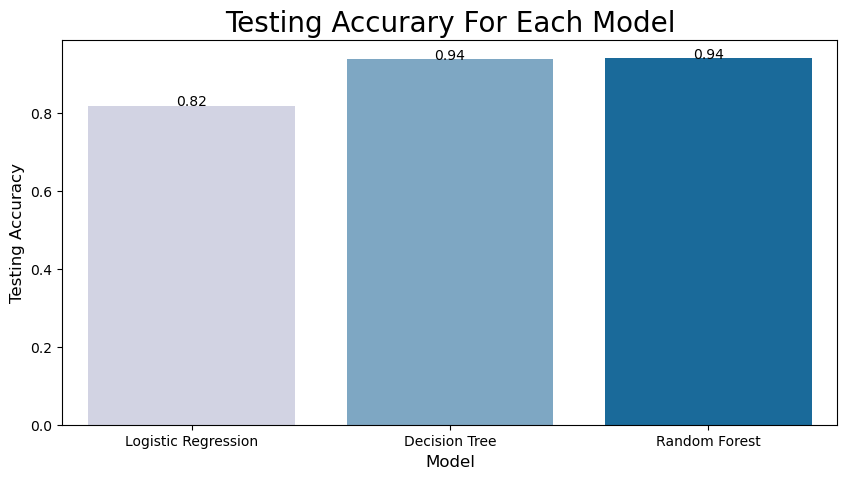

In [293]:
# Visualizing testing accuracy of each model: 
plt.style.use('default')
plt.figure(figsize=(10,5))
p=sns.barplot(x='model', y='testing_accuracy', data=model_scores, palette='PuBu')
plt.title('Testing Accurary For Each Model', fontsize = 20)
plt.xlabel('Model', fontsize = 12)
plt.ylabel('Testing Accuracy', fontsize = 12)
for index, row in model_scores.iterrows():
    p.text(x=row.name, y=row.testing_accuracy, s=round(row.testing_accuracy,2), color='black', horizontalalignment='center');

*We can see **Random Forest Classifier Model** is working better incase of unseen data, thus choosing Random Forest Model*

*But as the accuracy is almost same for both Decision Tree and Random Forest, we can choose Decision Tree as well because it's simpler and easy to understand.*

#### 6) Model Evaluation 

*For Random Forest Model*

In [299]:
#Making predictions:

rf_pred = rf.predict(X_test)

In [302]:
#Confusion Matrix and F1 Score:

print("Test accuracy: {:.3f}".format(rf.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, rf_pred)))

cm = confusion_matrix(y_test, rf_pred)
print(cm)

Test accuracy: 0.941
F1 score: 0.917
[[14645   389]
 [ 1030  7814]]


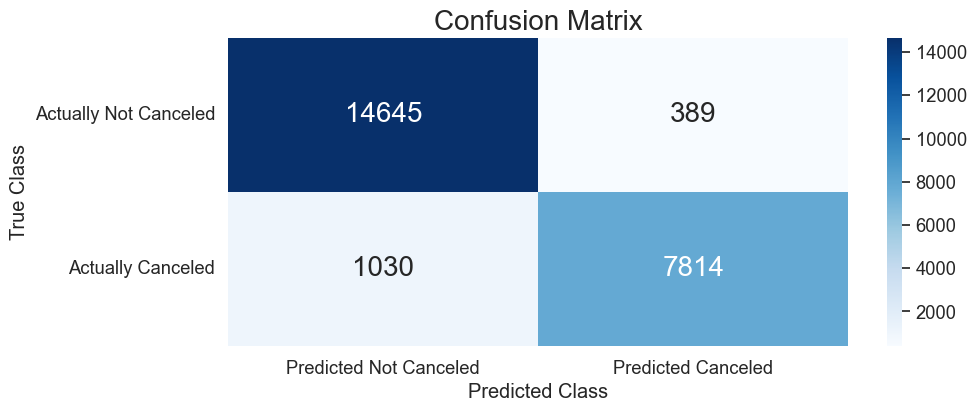

In [303]:
#Putting CM in a df and visualizing it:

cm_df = pd.DataFrame(cm, index=['Actually Not Canceled', 'Actually Canceled'],
                 columns=['Predicted Not Canceled', 'Predicted Canceled'])

sns.set(font_scale=1.2)
plt.figure(figsize=(10,4))
    
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues",xticklabels=cm_df.columns, yticklabels=cm_df.index, annot_kws={"size": 20})
plt.title("Confusion Matrix", size=20)
plt.xlabel('Predicted Class')
plt.ylabel('True Class');

In [304]:
# True Positives:
TP = 7814
# True Negatives:
TN = 14645
# False Posititives: 
FP = 389
# False Negatives: 
FN = 1030

total = 7814+14645+389+1030

print(f'Correctly classified: {np.round((TP+TN)/total*100)}%')
print(f'Canceled bookings correctly classified: {np.round(TP/(TP+FN)*100)}%')
print(f'Not canceled bookings correctly classified: {np.round(TN/(TN+FP)*100)}%')
print(f'Bookings predicted canceled that are actually canceled: {np.round(TP/(TP+FP)*100)}%')
print(f'Bookings predicted not canceled that are actually not canceled: {np.round(TN/(TN+FN)*100)}%')

Correctly classified: 94.0%
Canceled bookings correctly classified: 88.0%
Not canceled bookings correctly classified: 97.0%
Bookings predicted canceled that are actually canceled: 95.0%
Bookings predicted not canceled that are actually not canceled: 93.0%
